In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

model = LinearRegression()

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


In [4]:
print(train_df.head().to_string())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside   

In [5]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Select relevant columns for the model
X = train_df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]
y = train_df['SalePrice']

In [7]:
X.head()

,GrLivArea,BedroomAbvGr,FullBath,HalfBath
0,1710,3,2,1
1,1262,3,2,0
2,1786,3,2,1
3,1717,3,1,0
4,2198,4,2,1


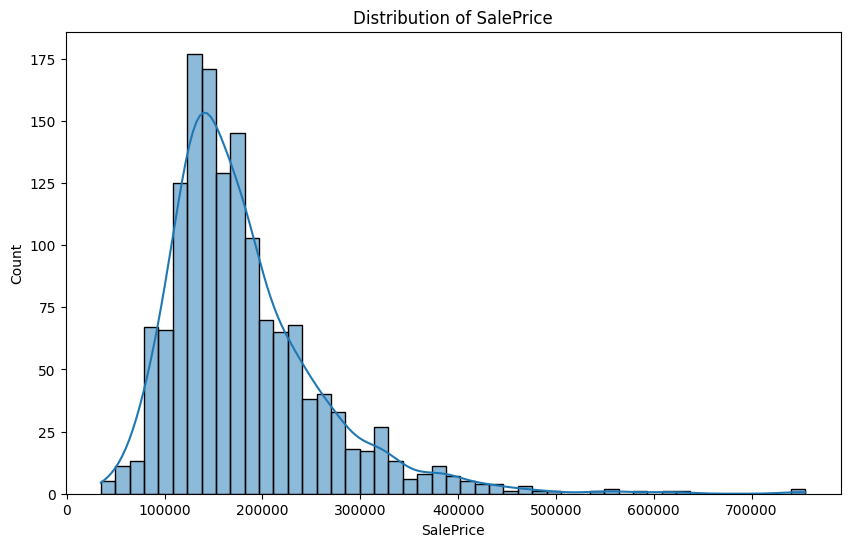

In [8]:
# Visualize the distribution of target variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()


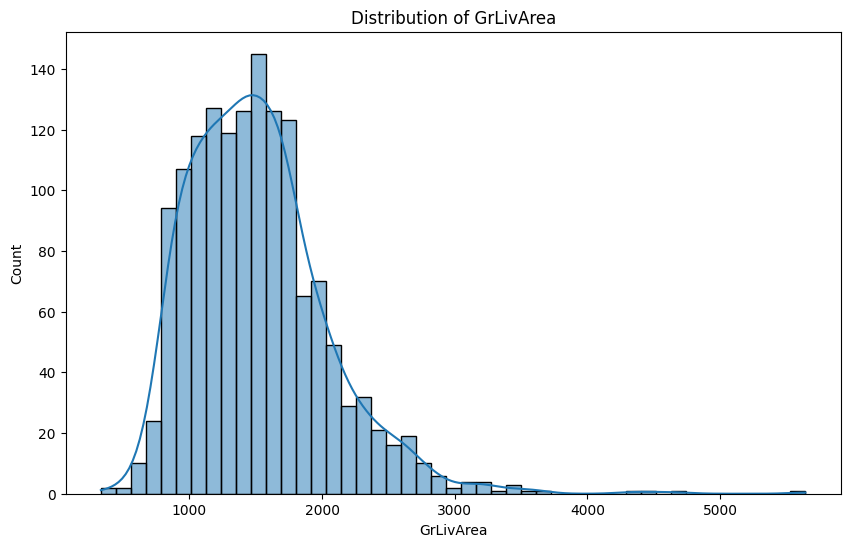

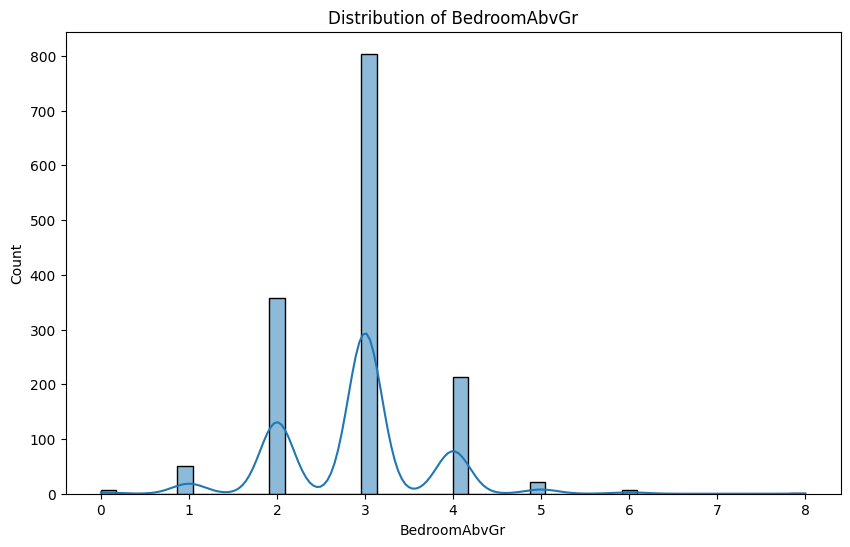

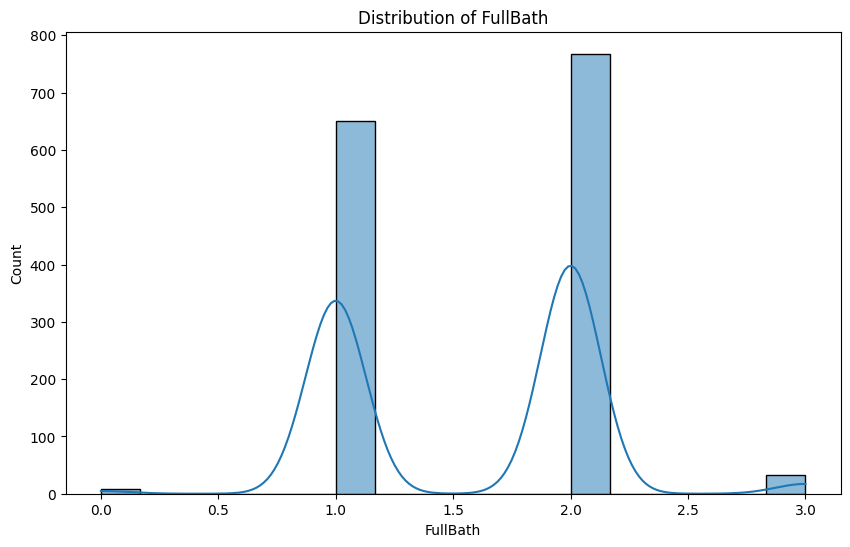

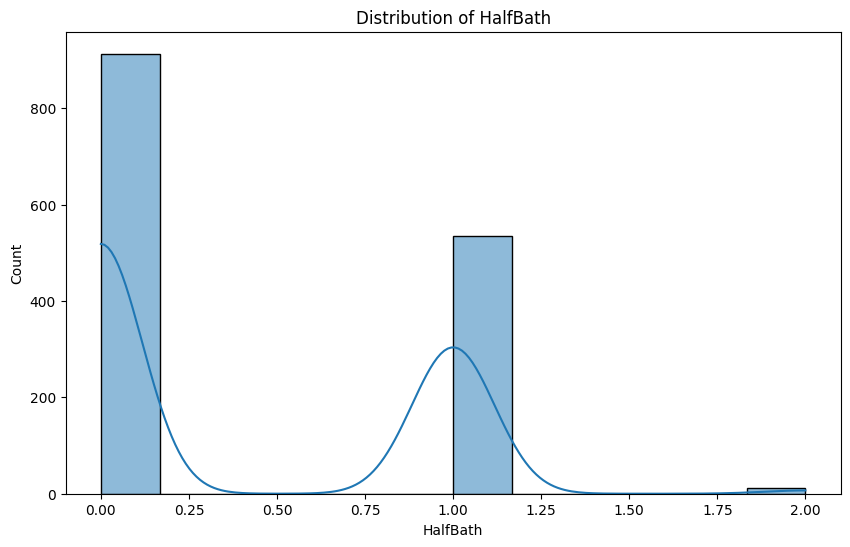

In [9]:
# Visualize the distribution of features
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath','HalfBath']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

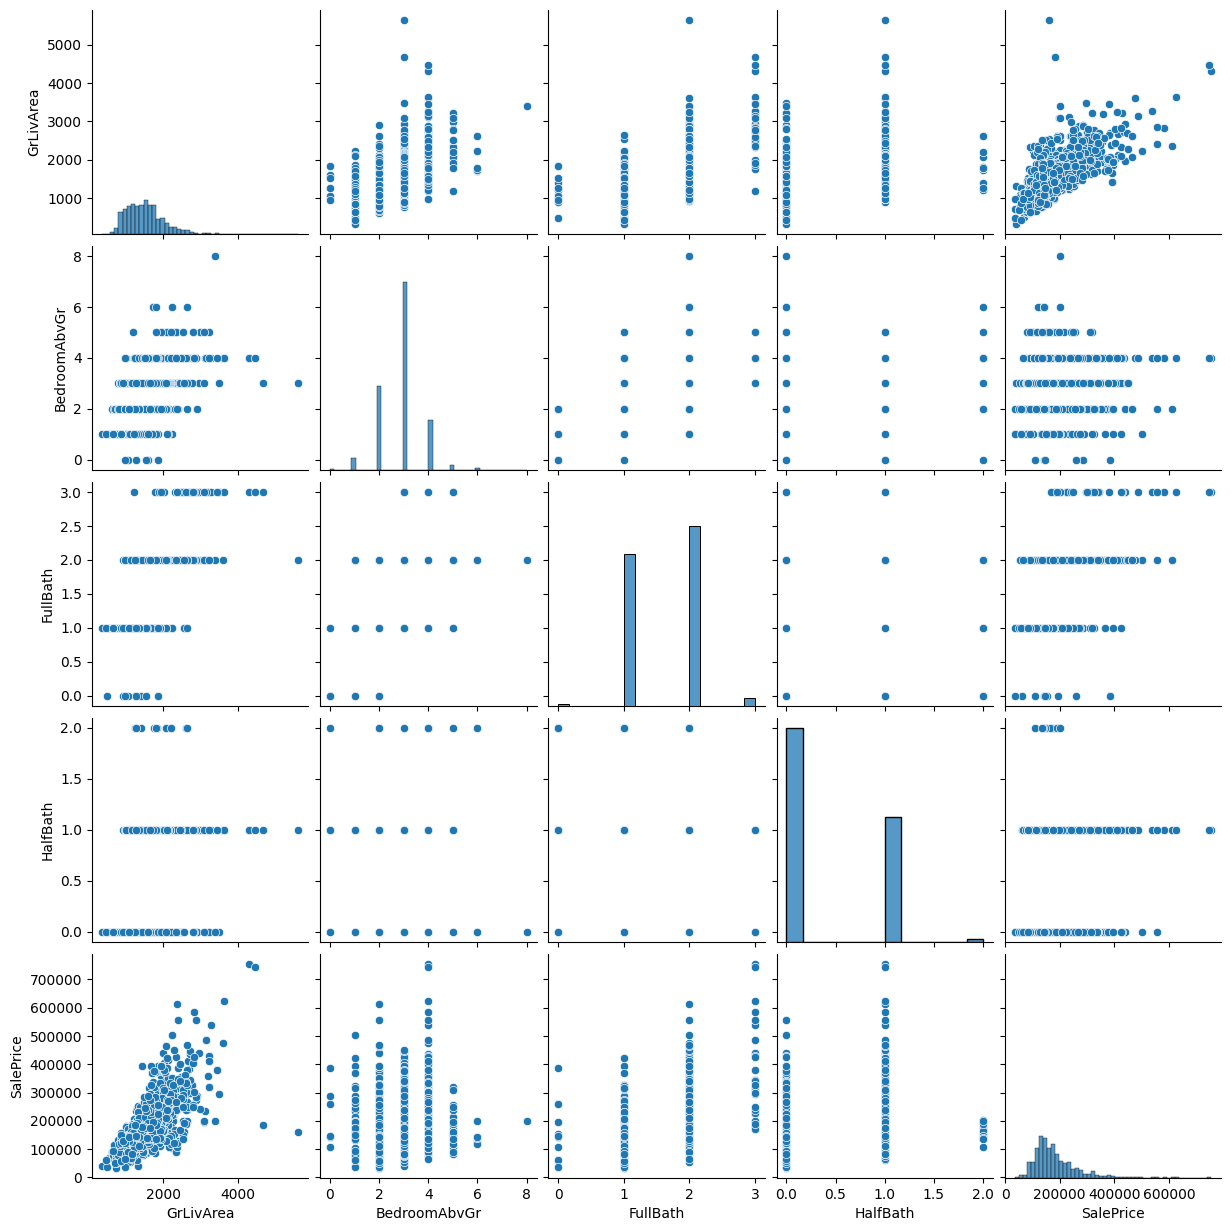

In [10]:
# Check for outliers in the features
sns.pairplot(train_df[['GrLivArea', 'BedroomAbvGr', 'FullBath','HalfBath', 'SalePrice']],height=2.5)
plt.show()

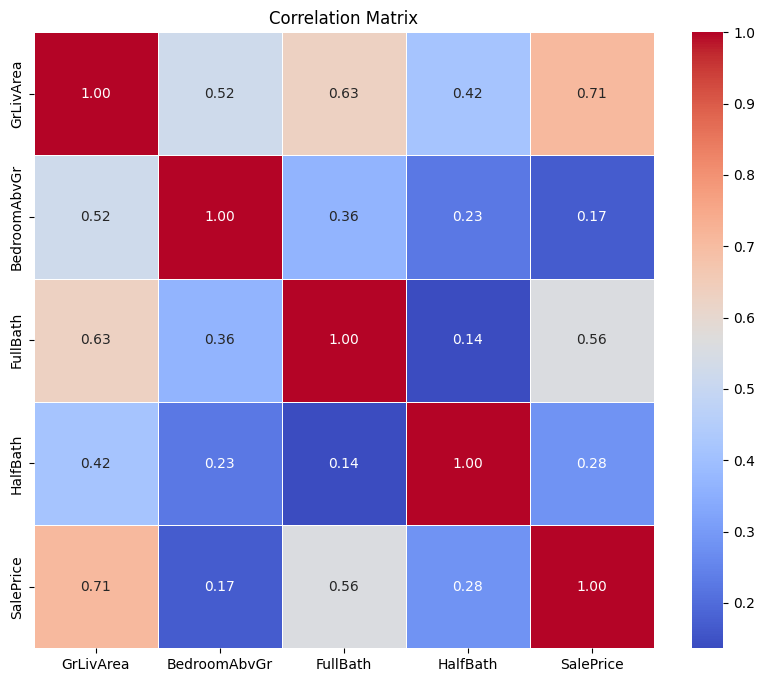

In [11]:
# Create a DataFrame with the selected features
df_corr = train_df[['GrLivArea', 'BedroomAbvGr', 'FullBath','HalfBath', 'SalePrice']]

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Define the features and target
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
target = 'SalePrice'

# Calculate IQR for each feature
Q1 = train_df[features].quantile(0.25)
Q3 = train_df[features].quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)

GrLivArea       1129.5
BedroomAbvGr       2.0
FullBath           1.0
HalfBath           0.0
Name: 0.25, dtype: float64
GrLivArea       1776.75
BedroomAbvGr       3.00
FullBath           2.00
HalfBath           1.00
Name: 0.75, dtype: float64
GrLivArea       647.25
BedroomAbvGr      1.00
FullBath          1.00
HalfBath          1.00
dtype: float64


In [14]:
print(train_df[((train_df[features] < (Q1 - 1.5 * IQR)) | (train_df[features] > (Q3 + 1.5 * IQR))).any(axis=1)])

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
53      54          20       RL         68.0    50271   Pave   NaN      IR1   
58      59          60       RL         66.0    13682   Pave   NaN      IR2   
118    119          60       RL         90.0    12376   Pave   NaN      Reg   
137    138          90       RL         82.0    11070   Pave   NaN      Reg   
144    145          90       RM         70.0     9100   Pave   NaN      Reg   
185    186          75       RM         90.0    22950   Pave   NaN      IR2   
189    190         120       RL         41.0     4923   Pave   NaN      Reg   
197    198          75       RL        174.0    25419   Pave   NaN      Reg   
198    199          75       RM         92.0     5520   Pave   NaN      Reg   
231    232          60       RL        174.0    15138   Pave   NaN      IR1   
291    292         190       RL         55.0     5687   Pave  Grvl      Reg   
304    305          75       RM         87.0    1838

In [16]:
print(train_df[((train_df[features] < (Q1 - 1.5 * IQR)) | (train_df[features] > (Q3 + 1.5 * IQR))).any(axis=1)].count())

Id               60
MSSubClass       60
MSZoning         60
LotFrontage      47
LotArea          60
                 ..
MoSold           60
YrSold           60
SaleType         60
SaleCondition    60
SalePrice        60
Length: 81, dtype: int64


In [17]:
# Filter out outliers
filtered_data = train_df[~((train_df[features] < (Q1 - 1.5 * IQR)) | (train_df[features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Define X and y
X = filtered_data[features]
y = filtered_data[target]

<Axes: >

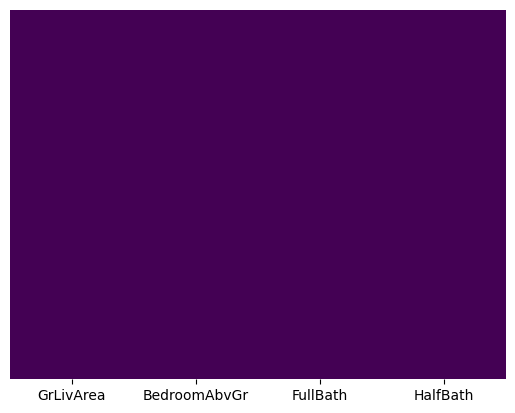

In [18]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
print(X.shape)
print(X.isnull().sum())

(1400, 4)
GrLivArea       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
dtype: int64


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1400 non-null   int64
 1   BedroomAbvGr  1400 non-null   int64
 2   FullBath      1400 non-null   int64
 3   HalfBath      1400 non-null   int64
dtypes: int64(4)
memory usage: 54.7 KB


In [21]:
X_train = X.iloc[:1000]
Y_train = y.iloc[:1000]
X_val = X.iloc[1000:1400]
Y_val = y.iloc[1000:1400]

In [22]:
# Create a pipeline for normalization and skewness correction
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('power_transformer', PowerTransformer(method='yeo-johnson')),
    ('model', LinearRegression())
])

In [23]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('power_transformer', PowerTransformer()),
                ('model', LinearRegression())])

In [24]:
test_x= test_df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]
print(test_x.shape)
print(test_x.isnull().sum())


(1459, 4)
GrLivArea       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
dtype: int64


In [25]:
Y_pred_val = pipeline.predict(X_val)


In [26]:
print(Y_pred_val)
print(Y_pred_val.shape)

[ 84903.75457707 229466.50251996 156763.08327708 216478.81194473
 248428.3646465  265869.15833143 189508.67115552  98841.29241411
 205548.02864409 115059.40494057 167384.36875431 169385.93156853
 194174.26581413 144747.16838526 248097.46679029 197083.0498284
 202289.05488391 233723.26672818 267181.97044339 227864.07009166
 198657.25527794 109000.70027573 143146.27097651 124145.77877329
 274333.08260277 202207.95500757 154289.6954369  108831.40140509
 108252.02179016 147672.28748388 135819.20883595 163355.59023044
 184501.479252   201350.44255732 189831.4486108  115887.99833491
 123522.40728897  98841.29241411 160998.15862776 106188.89994986
 188920.81123559 139533.97222464 193160.29903171 125980.47054453
 114480.18968661 244442.76540634 219093.63893187 186688.52026128
 153557.47148261 185495.99896472 185122.24786472 179676.13710336
 116062.30184391 169100.91131404 153669.4574428  140004.82739446
 150087.79829021 206588.72598858  49067.34089365  92238.08846916
 147988.14125665 131025.78

In [27]:
# Evaluate the model performance
mse = mean_squared_error(Y_val, Y_pred_val)
r2 = r2_score(Y_val, Y_pred_val)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1985657305.758046
R-squared: 0.5279568446033056


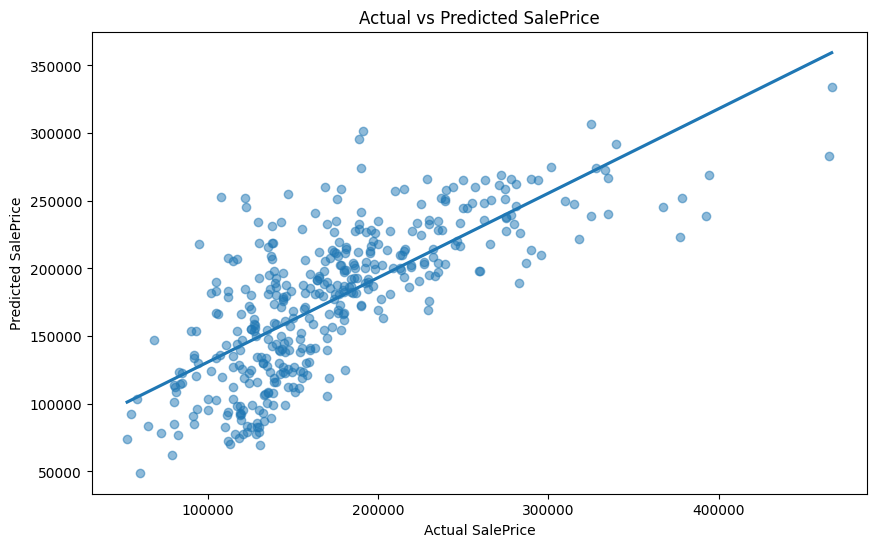

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=Y_val, y=Y_pred_val, ci=None, scatter_kws={'alpha':0.5})

plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
# plt.plot([Y_val.min(), Y_pred_val.max()], [Y_val.min(), Y_pred_val.max()], 'k--', lw=2)
plt.show()


In [29]:
Y_pred = pipeline.predict(test_x)


In [30]:
print(Y_pred)
print(Y_pred.shape)

[109339.13683149 150019.01895427 209121.38810685 ... 103257.2349331
  95551.00853618 249205.34559955]
(1459,)


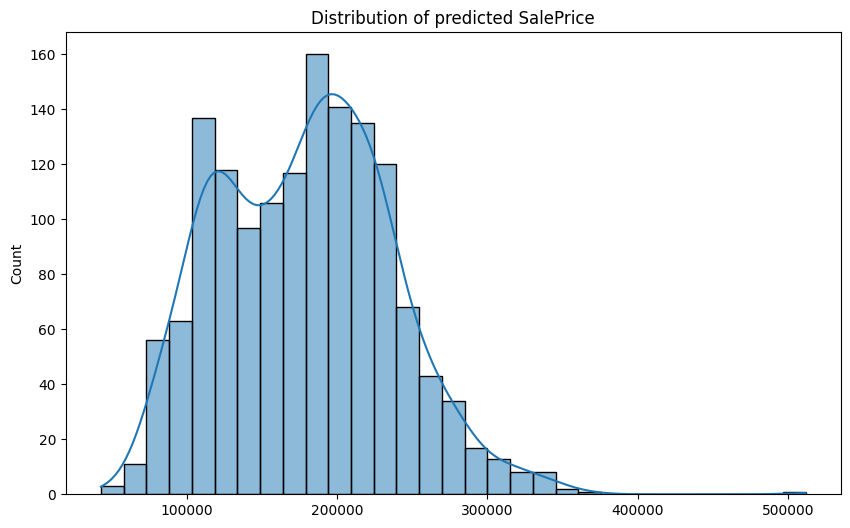

In [31]:
# Visualize the distribution of target variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(Y_pred, kde=True)
plt.title('Distribution of predicted SalePrice')
plt.show()
